Titanic CV experiment

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('future.no_silent_downcasting', True)
df_titanic = pd.read_csv(f'data/titanic_train.csv')
#obtin Survived column as y and remove from df_titanic
y = df_titanic['Survived']

cls = RandomForestClassifier(n_estimators=100, random_state=1) 

df_features = df_titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

#clean data
for column in ['Sex','Embarked']:
    df_features.loc[:,column] = LabelEncoder().fit_transform(df_features[column])
df_features = df_features.fillna(df_features.median())

scores = cross_val_score(cls,df_features, y, cv=5)
print (f"Accuracy: {scores.mean():0.2f} ({scores.std():0.2f}) [{scores}]")





Accuracy: 0.80 (0.02) [[0.77586207 0.79885057 0.83333333 0.77586207 0.81609195]]


Titanic train/test experiment

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

pd.set_option('future.no_silent_downcasting', True)
df_titanic_train = pd.read_csv(f'data/titanic_train.csv')
y_train = df_titanic_train['Survived']

cls = RandomForestClassifier(n_estimators=100, random_state=1) 

df_features = df_titanic_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
for column in ['Sex','Embarked']:
    df_features.loc[:,column] = LabelEncoder().fit_transform(df_features[column])

df_features = df_features.fillna(df_features.median())
cls.fit(df_features, y_train)

df_titanic_test = pd.read_csv(f'data/titanic_test.csv')

y_test = df_titanic_test['Survived']
df_features_test = df_titanic_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
for column in ['Sex','Embarked']:
    df_features_test.loc[:,column] = LabelEncoder().fit_transform(df_features_test[column])

y_pred = cls.predict(df_features_test)
df_titanic_test['result']=y_pred==y_test.values

print (df_titanic_test)
acc = accuracy_score(y_test.values, y_pred)
print(acc)



    PassengerId  Survived  Pclass                                              Name     Sex   Age  SibSp  Parch            Ticket     Fare        Cabin Embarked  result
0           870         1       3                   Johnson, Master. Harold Theodor    male   4.0      1      1            347742  11.1333          NaN        S    True
1           871         0       3                                 Balkic, Mr. Cerin    male  26.0      0      0            349248   7.8958          NaN        S    True
2           872         1       1  Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1      1             11751  52.5542          D35        S    True
3           873         0       1                          Carlsson, Mr. Frans Olof    male  33.0      0      0               695   5.0000  B51 B53 B55        S    True
4           874         0       3                       Vander Cruyssen, Mr. Victor    male  47.0      0      0            345765   9.0000          NaN    

titanic tree

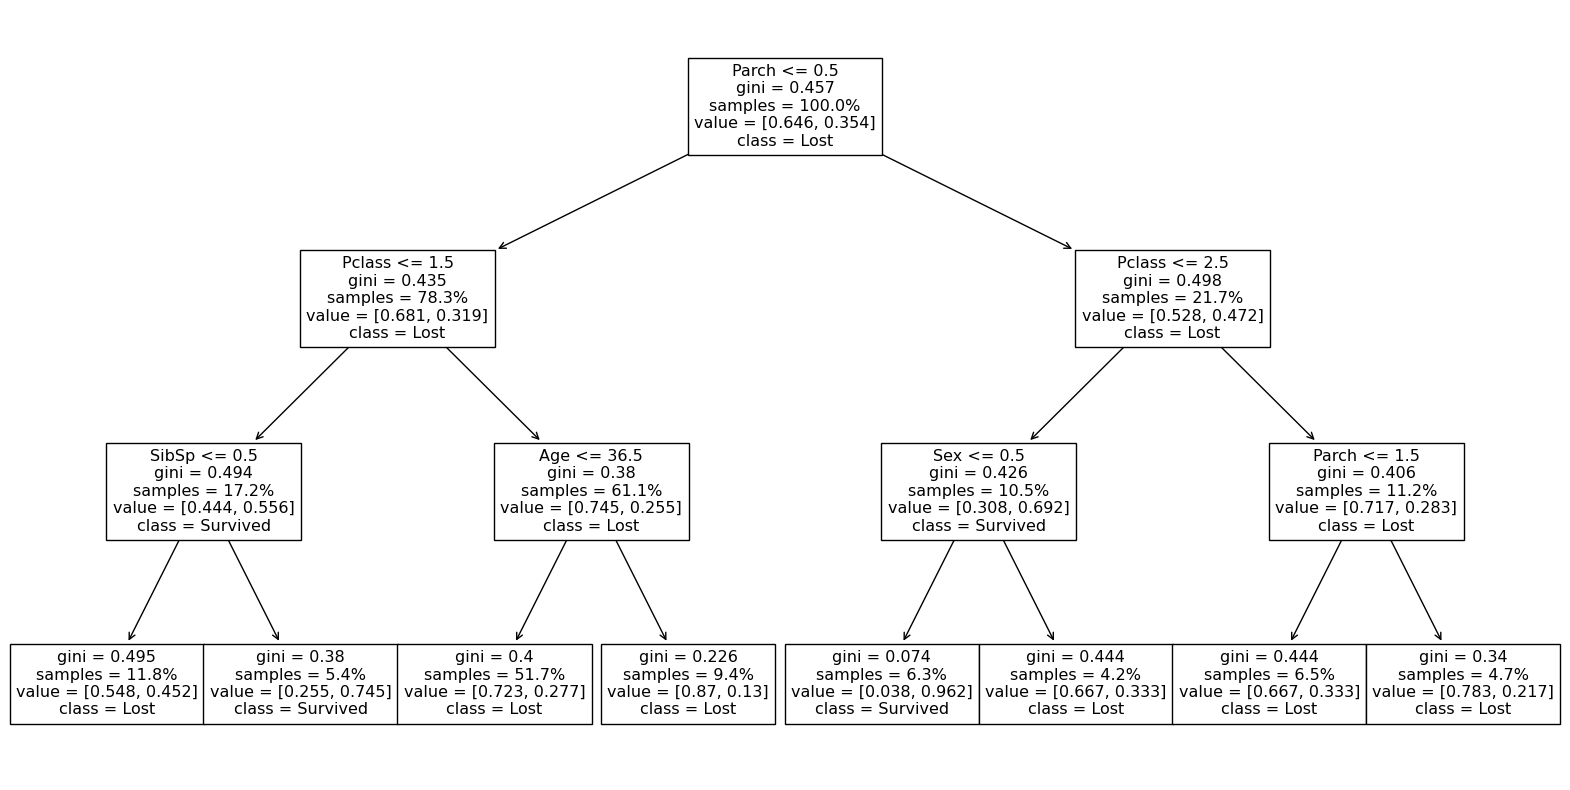

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

pd.set_option('future.no_silent_downcasting', True)
df_titanic_train = pd.read_csv(f'data/titanic_train.csv')
y_train = df_titanic_train['Survived']

cls = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=3) 

df_features = df_titanic_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
for column in ['Sex','Embarked']:
    df_features.loc[:,column] = LabelEncoder().fit_transform(df_features[column])
df_features = df_features.fillna(df_features.median())
cls.fit(df_features, y_train)

plt.figure(figsize=(20,10))
plot_tree(cls.estimators_[0],class_names=['Lost','Survived'],feature_names=df_features.columns,proportion=True)
plt.show()

titanic feature importance

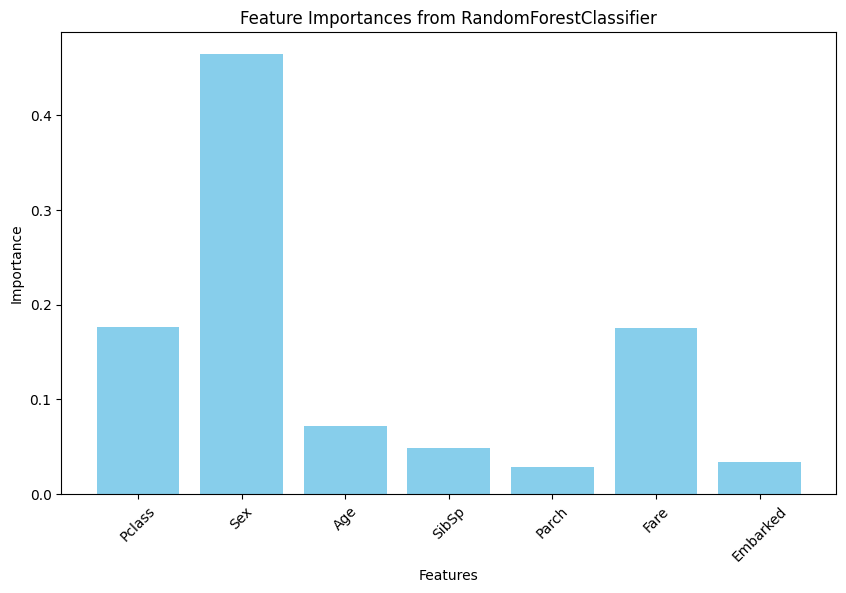

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

pd.set_option('future.no_silent_downcasting', True)
df_titanic_train = pd.read_csv(f'data/titanic_train.csv')
y_train = df_titanic_train['Survived']

cls = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=3) 

df_features = df_titanic_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
for column in ['Sex','Embarked']:
    df_features.loc[:,column] = LabelEncoder().fit_transform(df_features[column])
df_features = df_features.fillna(df_features.median())
cls.fit(df_features, y_train)
feature_importances = cls.feature_importances_
features = df_features.columns

# Create a bar chart of the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.xticks(rotation=45)
plt.show()


